<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Worksheets/10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df = pd.read_csv(url)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


### Clean the dataset 
---


In [114]:
df_filtered = df
df_filtered= df_filtered.dropna()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       113376 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.9+ MB


### Ideas for cleaning the data


1.   Remove the unnamed column as it is just an index that not needed.
2.   Make sure that there are no spaces " " in the columns
3. Sort by genre or year.
4. Remove films with no ranking - to reduce the size.

### Decided only rank needed to be cleaned up.








### How many movies of each genre are there?
---

In [124]:
#Using the full dataframe to get numbers of films per genre
genres = df["genre"].value_counts()

print(genres)

Short          72894
Drama          72635
Comedy         54667
Documentary    35698
Animation      17038
Romance        13562
Action         12890
Crime          12610
Family         11074
Thriller       10681
Adventure       8598
Western         8231
Horror          7423
Musical         6843
Sci-Fi          4957
Mystery         4951
Fantasy         4871
Music           4444
War             4398
Film-Noir        429
Name: genre, dtype: int64


### Which director has the highest ranked movies?
---

In [125]:
directors = df_filtered
directors["fullname"] = df_filtered["first_name"] + " " + df_filtered["last_name"]
directors = directors.drop(columns = ["first_name", "last_name"])
directors_rank = directors.groupby(["fullname"])["rank"].mean()
dir_toprank = directors_rank.sort_values(ascending = False)
print(dir_toprank.head(10))

fullname
Kirsten Tretbar       9.9
Debs Tarrier          9.9
Andrew Cappelletti    9.9
Scott Barkan          9.9
Matthew Crandall      9.9
Gregg Zehentner       9.9
Arünas Zebriünas      9.9
Zack Resnicoff        9.9
Luke S. Goljan        9.8
Rubén Gámez           9.8
Name: rank, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### How many movies have ranks of over 9?
---


In [137]:
#Dropped duplicates of movie names as they have multiple entries due to genre column.
df_dropdups = df_filtered.drop_duplicates(["name"])
top_movie_count = df_dropdups[df_dropdups["rank"] > 9].count()
#from cheat sheet-> df[df['column name'] == value] 
print(top_movie_count[5])

806


### Plot a bar chart of mean rank and genre
---

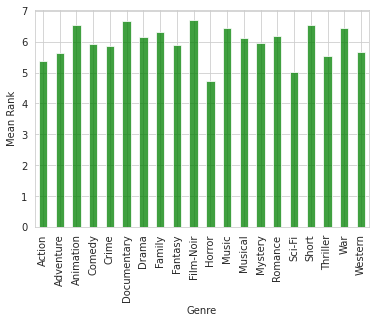

In [118]:
# copied from Jay
rank_by_genre = df_filtered.groupby('genre')['rank'].mean()
bar_plot = rank_by_genre.plot(x="genre", y=rank_by_genre, kind="bar", alpha=0.75, rot=90, color = 'g')
bar_plot.set_xlabel("Genre")
bar_plot.set_ylabel("Mean Rank")
plt.show()

### Plot a pie chart of how many movies of each genre there are 
---


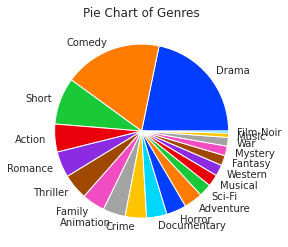

In [119]:
colors = sns.color_palette('bright')
labels = genres.keys()
plt.pie(genres, labels = labels, colors = colors)
plt.title("Pie Chart of Genres")
plt.show()

### Plot a graph showing the mean Rank for each year 

year
1892    3.780000
1893    6.800000
1894    6.100000
1895    5.644444
1896    4.307407
          ...   
2000    6.065483
2001    6.134224
2002    6.299257
2003    6.207317
2004    6.216699
Name: rank, Length: 113, dtype: float64


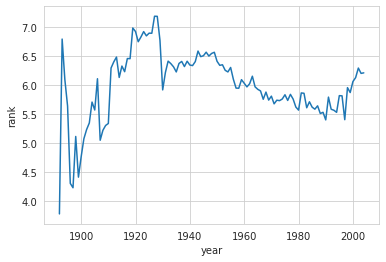

In [120]:
rank_by_year = df_filtered.groupby('year')['rank'].mean()
print(rank_by_year)
#plot the chart of the data means 
chart = sns.lineplot(data=rank_by_year)
sns.set_style("whitegrid")

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  Try ranking the directors by rating but also number of movies made.
2.  write a function to return list of movies for a given director.
3.  return a count of list of modern movies > 2000 to compare with Jay's count of movies released before 2000.
4. plot total number of movies each year.

### Complete the tasks you have set out in the exercise above. 
---


In [141]:
#Task 1 Rank the directors by their movie ratings and the number of movies they have directed.
directors = df_filtered.drop_duplicates("name")
#create a new column with fullname in - concatenated from two columns, then remove the original columns.
directors["fullname"] = df_filtered["first_name"] + " " + df_filtered["last_name"]
directors = directors.drop(columns = ["first_name", "last_name"])
#group the directors ranks by their fullnames.
directors_rank = directors.groupby(["fullname"])["rank"].mean()
dir_toprank = directors_rank.sort_values(ascending = False)
print(dir_toprank.head(10))

fullname
Arünas Zebriünas       9.9
William T. Hurtz       9.9
Scott Barkan           9.9
Matthew Crandall       9.9
Kirsten Tretbar        9.9
Andrew Cappelletti     9.9
Debs Tarrier           9.9
Djordje Kadijevic      9.8
François Miron         9.8
Takis Kanellopoulos    9.8
Name: rank, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [121]:
#task 2 Write a function to return a list of all movies by a given director

def get_movies(df, fullname):
  list_of_movies = df[df["fullname"] == fullname]
  return list_of_movies

list_of_movies = get_movies(df_filtered.drop_duplicates("name"), "Quentin Tarantino")
movies = list_of_movies["name"]
print(movies)

328564                 Jackie Brown
328567            Kill Bill: Vol. 1
328570            Kill Bill: Vol. 2
328574    My Best Friend's Birthday
328576                 Pulp Fiction
328578               Reservoir Dogs
Name: name, dtype: object


In [122]:
# task 3 Count of movies released after year 2000
this_century = df_filtered[df_filtered["year"] >= 2000].count()
print(this_century)

Unnamed: 0    20378
first_name    20378
last_name     20378
name          20378
year          20378
rank          20378
genre         20378
fullname      20378
dtype: int64


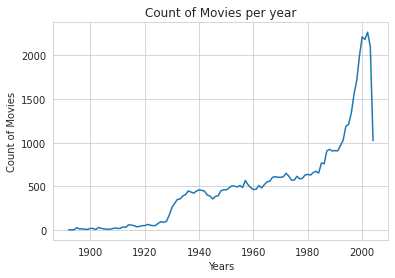

In [135]:
#Task 4 Plot the total number of movies by year.
remove_duplicates = df_filtered.drop_duplicates(["name"])
count_by_year = remove_duplicates.groupby('year')["name"].count()
#plot the chart of the data meancountss 
plt.title("Count of Movies per year")
plt.xlabel("Years")
plt.ylabel("Count of Movies")
chart = sns.lineplot(data=count_by_year)
sns.set_style("whitegrid")


# Reflection
----

## What skills have you demonstrated in completing this notebook?

We pulled together some of the previous worksheets on Pandas for this project. We use droping null values, filtering on columns and grouping by another. Plotting tools like pie charts and line graphs. Working with another person was helpful for me as I often can't get started quickly and sometimes can't see the typos or missing brackets easily.

## What caused you the most difficulty?

Your answer: Jay and I worked together on this mini project, although Jay was well ahead of me when I started. It took me a while to catch up but Jay was patient and helped when I was really stuck. Mostly, I get stuck on syntax and what command to use sometimes. I struggled with the filtering functions still which is very frustrating to me. I will try and practice this more.